In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Problem 7

The following are 30 time lapses in minutes between eruptions of Old
Faithful greyser in Yellowstone National Park, recorded between the hours of 8am and 10pm on a
certain day, and measured from the beginning of one eruption to the beginning of the next.

68, 63, 66, 63, 61, 44, 60, 62, 71, 62, 62, 55, 62, 67, 73,
72, 55, 67, 68, 65, 60, 61, 71, 60, 68, 67, 72, 69, 65, 66.

A researcher wants to use these data for inference purpose, but is concerned about whether it is
reasonable to treat such data as a random sample. What do you think? Justify your answer.

In [2]:
data = np.array(
    [68, 63, 66, 63, 61, 44, 60, 62, 71, 62, 62, 55, 62, 67, 73,
72, 55, 67, 68, 65, 60, 61, 71, 60, 68, 67, 72, 69, 65, 66]
)

# use runs test
from statsmodels.sandbox.stats.runs import runstest_1samp
z_stat, p_value = runstest_1samp(data, correction=False)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis. The data is not random.")
else:
    print("Fail to reject the null hypothesis. The data is random.")

Z-statistic: -1.0951
P-value: 0.2735
Fail to reject the null hypothesis. The data is random.


## Problem 8

In a psychological experiment, the research question of interest is whether
a rat “learned” its way through a maze during 65 trials. Suppose the time-ordered observations
on number of correct choices by the rat on each trial are as follows:

0, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 4, 3, 1, 2, 2, 1, 2, 2,
2, 2, 3, 2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 4.

(a) Test these data for randomness against the alternative of a tendency to cluster, using the
dichotomizing criterion that 0, 1, or 2 correct choices indicate no learning, while 3 or 4
correct choices indicate learning.

(b) Would the runs up and down test be appropriate for these data? Why or why not?

In [3]:
trials = np.array([
    0, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 4, 3, 1, 2, 2, 1, 2, 2,
2, 2, 3, 2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 4.
]) 

In [4]:
# part (a)

# use runs test
from statsmodels.sandbox.stats.runs import runstest_1samp
z_stat, p_value = runstest_1samp(trials, cutoff=3, correction=False)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis. The data is clustered.")
else:
    print("Fail to reject the null hypothesis. The data is random.")

Z-statistic: -3.1576
P-value: 0.0016
Reject the null hypothesis. The data is clustered.


### (b)

TODO

## Problem 9

A group of four coins is tossed 160 times, and the following data are obtained:

| Number of heads | 0 | 1 | 2 | 3 | 4 |
|-----------------|---|---|---|---|---|
| Frequency       |16 |48 |55 |33 | 8 |

Do you think the four coins are balanced?

In [5]:
# Define the data
heads_counts = np.array([0, 1, 2, 3, 4])
frequencies = np.array([16, 48, 55, 33, 8])

# Calculate the expected frequencies under the assumption of balance (should be binomial)
n_trials = 4  # four coins
p = 0.5       # probability of heads for a balanced coin
n_observations = np.sum(frequencies)

# Binomial probabilities for k = 0, 1, 2, 3, 4 heads
binom_probs = stats.binom.pmf(heads_counts, n_trials, p)
expected_frequency = n_observations * binom_probs

# Calculate the chi-square statistic
chi_square = sum((frequencies[i] - expected_frequency[i]) ** 2 / expected_frequency[i] for i in range(5))
df = 4

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_square, df)

# Print the results
print(f"Chi-square statistic: {chi_square:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("The coins are not balanced.")
else:
    print("The coins are balanced.")


Chi-square statistic: 7.2417
P-value: 0.1237
The coins are balanced.


## Problem 12

A random sample of size 13 is drawn from an unknown continuous population $ F_X(x) $, with the following ordered results:

3.5, 4.1, 4.8, 5.0, 6.3, 7.1, 7.2, 7.8, 8.1, 8.4, 8.6, 9.0

A 90% confidence band is desired for $ F_X(x) $.

Plot a graph of the empirical distribution function $ S_n(x) $ and the resulting confidence bands.

In [6]:
data = [3.5, 4.1, 4.8, 5.0, 6.3, 7.1, 7.2, 7.8, 8.1, 8.4, 8.6, 9.0]

## Problem 13

In a vibration study, a random sample of 15 airplane components were subjected to severe
vibrations until they showed structural failures. The data given are failure times in minutes. Test
the null hypothesis that these observations can be regarded as a sample from the exponential
population with density function $f (x) = e^{−10x}/10 $ for $x ≥ 0$.

1.6, 10.3, 3.5, 13.5, 18.4, 7.7, 24.3, 10.7, 8.4, 4.9, 7.9, 12.0, 16.2, 6.8, 14.7

In [7]:
data = [1.6, 10.3, 3.5, 13.5, 18.4, 7.7, 24.3, 10.7, 8.4, 4.9, 7.9, 12.0, 16.2, 6.8, 14.7]

# use Kolmogorov-Smirnov test
results = stats.kstest(data, 'expon', args=(0, 1/10))
p_value = results.pvalue
print(f"P-value: {p_value:.2e}")
if p_value < 0.05:
    print("Reject the null hypothesis. The data does not come from the exponential population.")
else:
    print("Fail to reject the null hypothesis. The data comes from the exponential population.")

P-value: 1.18e-104
Reject the null hypothesis. The data does not come from the exponential population.


## Probelm 14

For the data $x$: 1.0, 2.3, 4.2, 7.1, 10.4, use the most appropriate procedure to test the null
hypothesis that the distribution is

(a) Exponential $F_0(x) = 1 − e^{−λx}$ (estimate $λ$ by $1/x$)

(b) Normal

In each part, carry the parameter estimates to the nearest hundredth and the distribution estimates
to the nearest ten thousandth.

In [8]:
data = np.array([1.0, 2.3, 4.2, 7.1, 10.4])

P-value: 0.9864
Fail to reject the null hypothesis. The data comes from the exponential population.


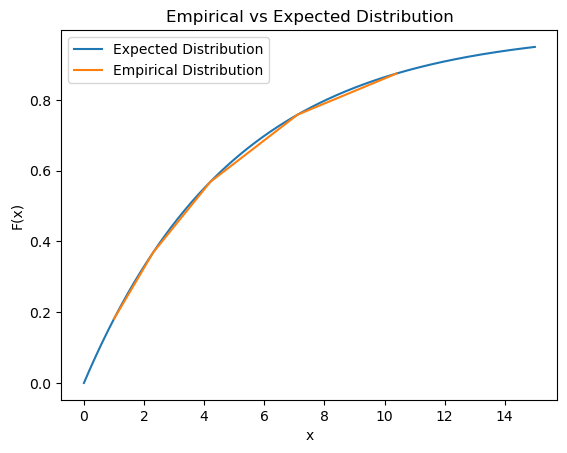

In [9]:
# part (a)

# estimate lambda by 1/x
lambda_hat = 1 / np.mean(data)

# estimate the distribution
F_0 = 1 - np.exp(-lambda_hat * data)

# use Kolmogorov-Smirnov test
results = stats.kstest(data, 'expon', args=(0, 1/lambda_hat))
p_value = results.pvalue
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis. The data does not come from the exponential population.")
else:
    print("Fail to reject the null hypothesis. The data comes from the exponential population.")
    
# plot expected distribution vs empirical distribution
x = np.linspace(0, 15, 1000)
y = 1 - np.exp(-lambda_hat * x)
plt.plot(x, y, label='Expected Distribution')
plt.plot(data, F_0, label='Empirical Distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Empirical vs Expected Distribution')
plt.show()

P-value (Lilliefors): 0.8586
Fail to reject the null hypothesis. The data comes from the normal population.


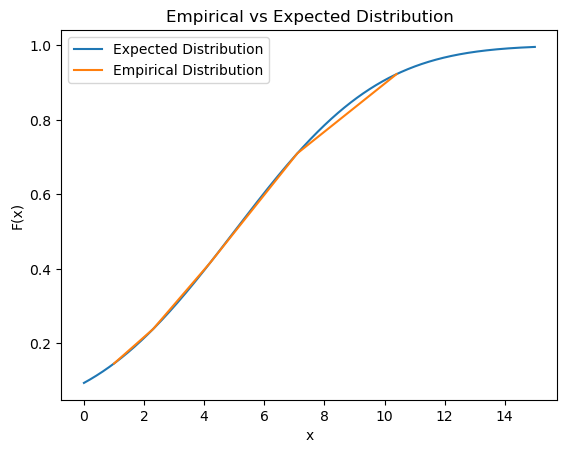

In [10]:
# part (b)

# estimate the mean and standard deviation
mean_hat = np.mean(data)
std_hat = np.std(data, ddof=1)

# estimate the distribution
F_0 = stats.norm.cdf(data, mean_hat, std_hat)

# Use the Lilliefors test for normality
from statsmodels.stats.diagnostic import lilliefors
stat, p_value = lilliefors(data, dist='norm')
print(f"P-value (Lilliefors): {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis. The data does not come from the normal population.")
else:
    print("Fail to reject the null hypothesis. The data comes from the normal population.")
    
# plot expected distribution vs empirical distribution
x = np.linspace(0, 15, 1000)
y = stats.norm.cdf(x, mean_hat, std_hat)
plt.plot(x, y, label='Expected Distribution')
plt.plot(data, F_0, label='Empirical Distribution')
plt.legend()
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Empirical vs Expected Distribution')
plt.show()